<a href="https://colab.research.google.com/github/Patatims/CCINSYSL_EXAM_COM-DF211/blob/main/So_exam_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam 💙 💛

Instructions ❗️❗️

❌ Do not remove or modify the notebook sections, subsections, exam questions or any text in this python notebook

✔️ Put your answer in the designated cells below each question

## Linear Regression

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

In [26]:
df = load_diabetes(as_frame=True, scaled=False)
df = df['frame']

In [27]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


1. Display the correlation of all features in the dataset using the `.corr()` function. `(5 points)`

In [29]:
correlation_matrix = df.corr()
print(correlation_matrix)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

2. Using `sns.heatmap()`, draw a heatmap of the correlation of all features of the dataset. `(5 points)`

 - Set the `annot` parameter to **True**

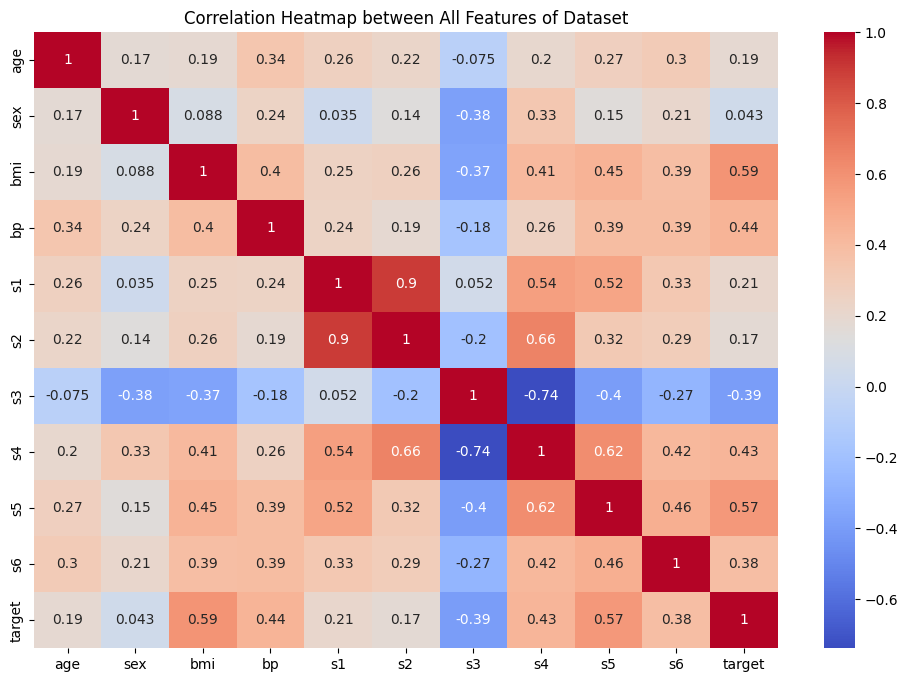

In [30]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between All Features of Dataset')
plt.show()


3. Split the data set into a training and test set. `(5 points)`

In [31]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['target'], axis=1)  # drop all columns except the 'target' assuming that is what we need
y = df['target']

# Split the data into a training set and a test set (e.g., 90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (397, 10)
X_test shape: (45, 10)
y_train shape: (397,)
y_test shape: (45,)


4. Use the `the MinMaxScaler()` method to scale down the training and test set. `(5 points)`

In [32]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. Create a new instance of the `LinearRegression` class. `(5 points)`

In [33]:
model = LinearRegression()

6. Use the `fit()` method to train the linear regression model using the scaled training set. `(5 points)`

In [34]:
model.fit(X_train_scaled, y_train)

LinearRegression()

7. Use the `predict()` method to make predictions using the scaled test set. `(5 points)`

In [35]:
y_pred = model.predict(X_test_scaled)

8. Display the intercept, slope and $R^2$. `(5 points)`

In [41]:
# Display the intercept (bias term)
intercept = model.intercept_
print("Intercept:", intercept, "\n")

# Display the slope coefficients for each feature
coefficients = model.coef_
print("Slope Coefficients:", coefficients, "\n")

# Use the trained model to make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate the R-squared (R²) score
r_squared = r2_score(y_test, y_pred)
print("R-squared (R^2) Score:", r_squared, "\n")

Intercept: -15.4204283610635 

Slope Coefficients: [   4.34320124  -25.0269787   127.32564418   82.15543327 -223.20324128
  150.98376487   34.21412257   61.93340191  186.10032999   19.2486248 ] 

R-squared (R^2) Score: 0.5514200923362627 



9. Write a `normal_equation()` function that will return the intercept and coefficients/slopes. `(5 points)`

In [42]:
def normal_equation(X, y):
    # Add a column of ones to the feature matrix X for the intercept term
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

    # Calculate the coefficients using the normal equation formula
    coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

    # Separate the intercept and coefficients
    intercept = coefficients[0]
    slopes = coefficients[1:]

    return intercept, slopes

10. Call the `normal_equation()` function and pass the scaled training set. Display the intercept and slopes. `(5 points)`

In [43]:
# Call the normal_equation() function with the scaled training set and Display it.
intercept, slopes = normal_equation(X_train_scaled, y_train)

print("Intercept:", intercept)
print("Slopes (Coefficients):", slopes)

Intercept: -15.4204283610077
Slopes (Coefficients): [   4.34320124  -25.0269787   127.32564418   82.15543327 -223.20324128
  150.98376487   34.21412257   61.93340191  186.10032999   19.2486248 ]
